In [1]:
from epi_model import *

In [2]:
from simulation_helper import *

In [3]:
from simulation_manager import simulation_manager

In [4]:
from frozendict import frozendict as fzd

In [5]:
dfs, modelsets = {},{}

In [6]:
names = [
    'HS1_expand300',
    'HS2',
    'synthetic_3'
]

In [7]:
def get_bounds(l, q, z=1.96):
    l = sorted(l)
    n = len(l)

    i = int( np.ceil( n*q - z*np.sqrt(n*q*(1-q)) ) )
    j = int( np.ceil( n*q + z*np.sqrt(n*q*(1-q)) ) )

    return (l[i], l[j])

In [8]:
for name in names:
    
    print(f'loading {name}')

    sim_m = simulation_manager()
    sim_m.load_models(name)

    rows = []
    for k,ms in sim_m.models.items():
        rows.append(sim_m.info(k))

    df = pd.DataFrame.from_records(rows)

    #df.head()
    
    dfs[name] = df
    modelsets[name] = sim_m

loading HS1_expand300
loading HS2
loading synthetic_3


In [9]:
comparisons = {
    'VACCINATE_P': [0.05, 0.10, 0.20, 0.50],
    'R0_mean': [1, 2.5, 4],
    'INITIAL_INFECT': [5, 10, 20]
}

In [10]:
defaults = {
    'R0_mean': 2.5,
    'VACCINATE_P': 0.20,
    'INITIAL_INFECT': 20
}

In [11]:
models = modelsets['HS1_expand300'].models

In [12]:
todel = []
for x in models:
    if 'strat' not in x:
        todel.append( x )
        
for x in todel:
    del models[x]

In [13]:
strats = set(x['strat'] for x in models)
strats = strats.difference({'none'})

In [14]:
strats = sorted(strats)

In [15]:
mean_means = dict(df.groupby('strat')['mean'].mean())

In [16]:
strats = sorted(strats,key=lambda x:-mean_means[x])

In [17]:
strats = [
    #'rand',
    'friend',
    'friendHighDegRandTop5',
    'friendHighDegRandTop3',
    'friendHighDegNormalErr20',
    'friendHighDegNormalErr10',
    'friendHighDeg',
    'friendHighDegChain',
    'targeted',
]

In [18]:
manager = modelsets['HS1_expand300']
infos = manager.info( {
    'strat': ['none','rand','friend'],
    'R0_mean': 1,
    'VACCINATE_P': 0.20,
    'INITIAL_INFECT': 20
} )

In [19]:
keys = [x[0] for x in iter_args({
    'strat': ['none','rand','friend'],
    'R0_mean': 1,
    'VACCINATE_P': 0.20,
    'INITIAL_INFECT': 20
})]

In [20]:
circles = [
    'friendHighDegRandTop5',
    'friendHighDegRandTop3',
    'friendHighDegNormalErr20',
    'friendHighDegNormalErr10',
    'friendHighDeg',
    'friendHighDegChain',
]

stars = [
    'targeted',    
]

squares = [
    'friend',
]

# HS1_expand300

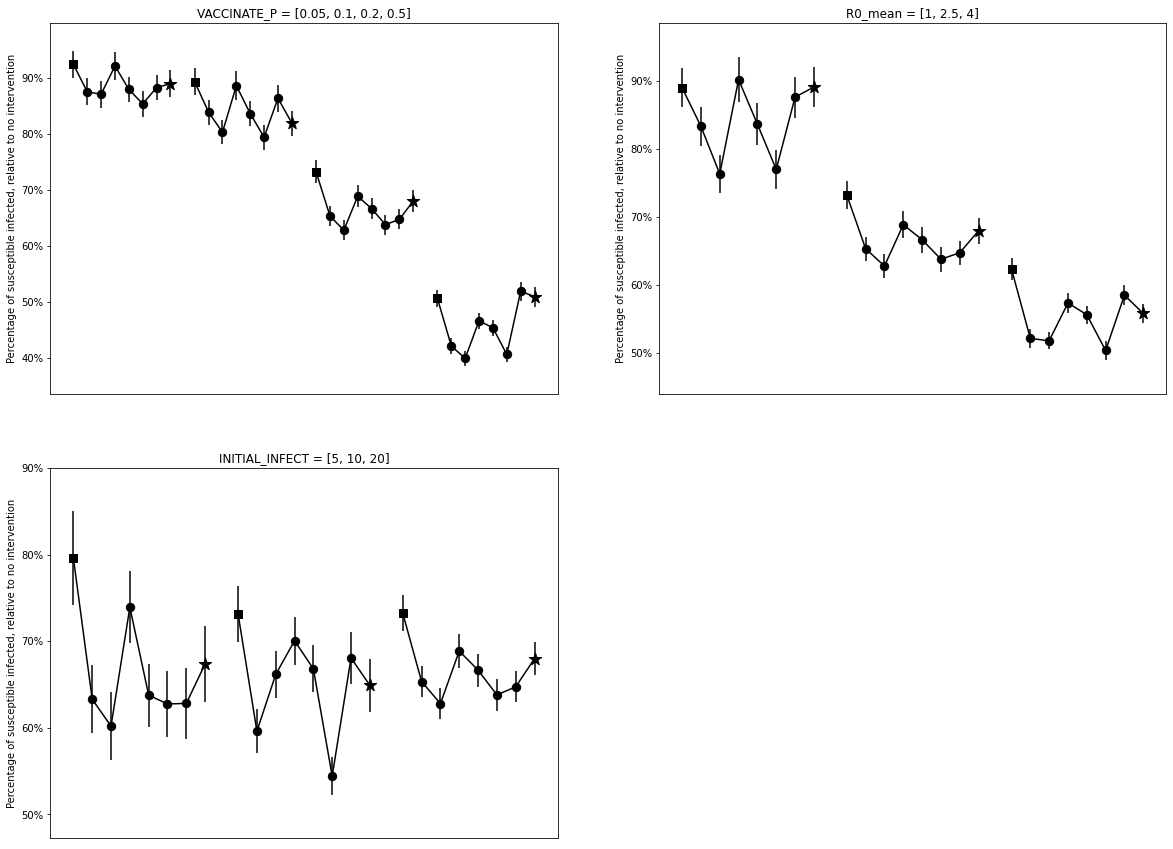

# HS2

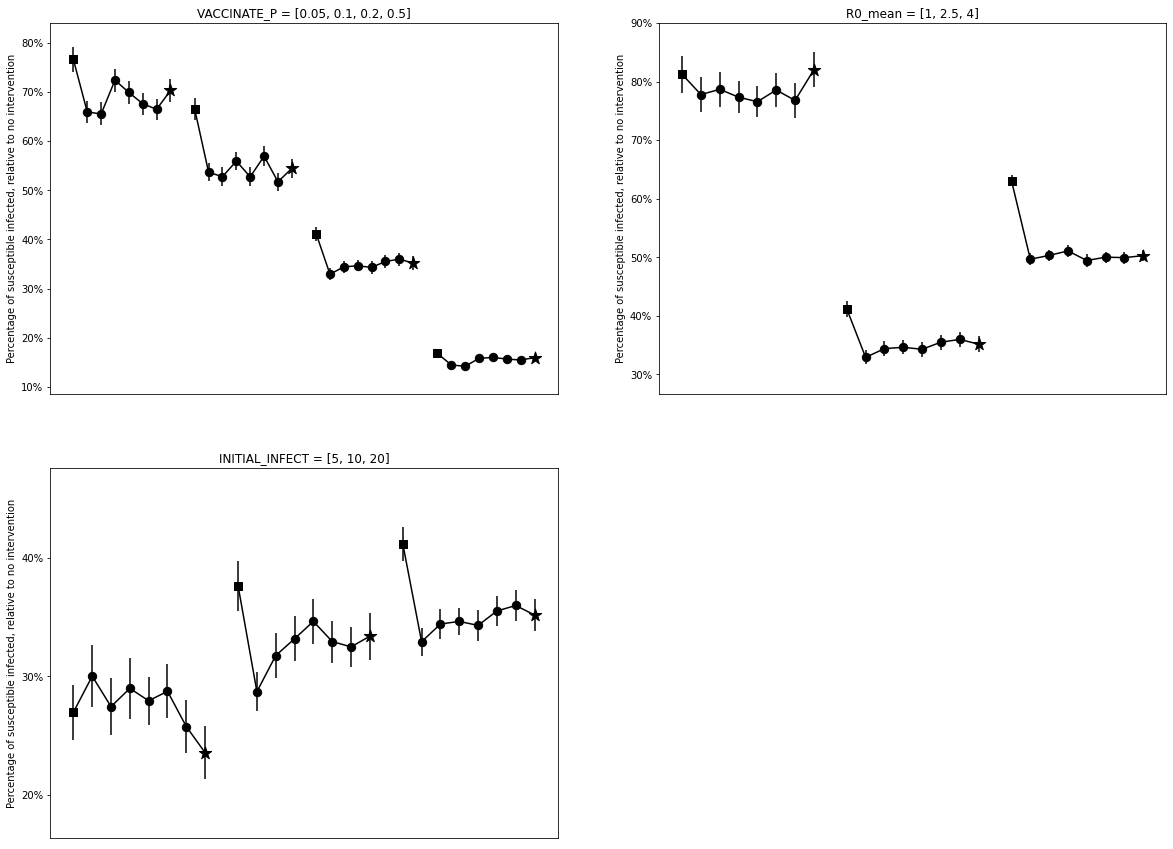

# synthetic_3

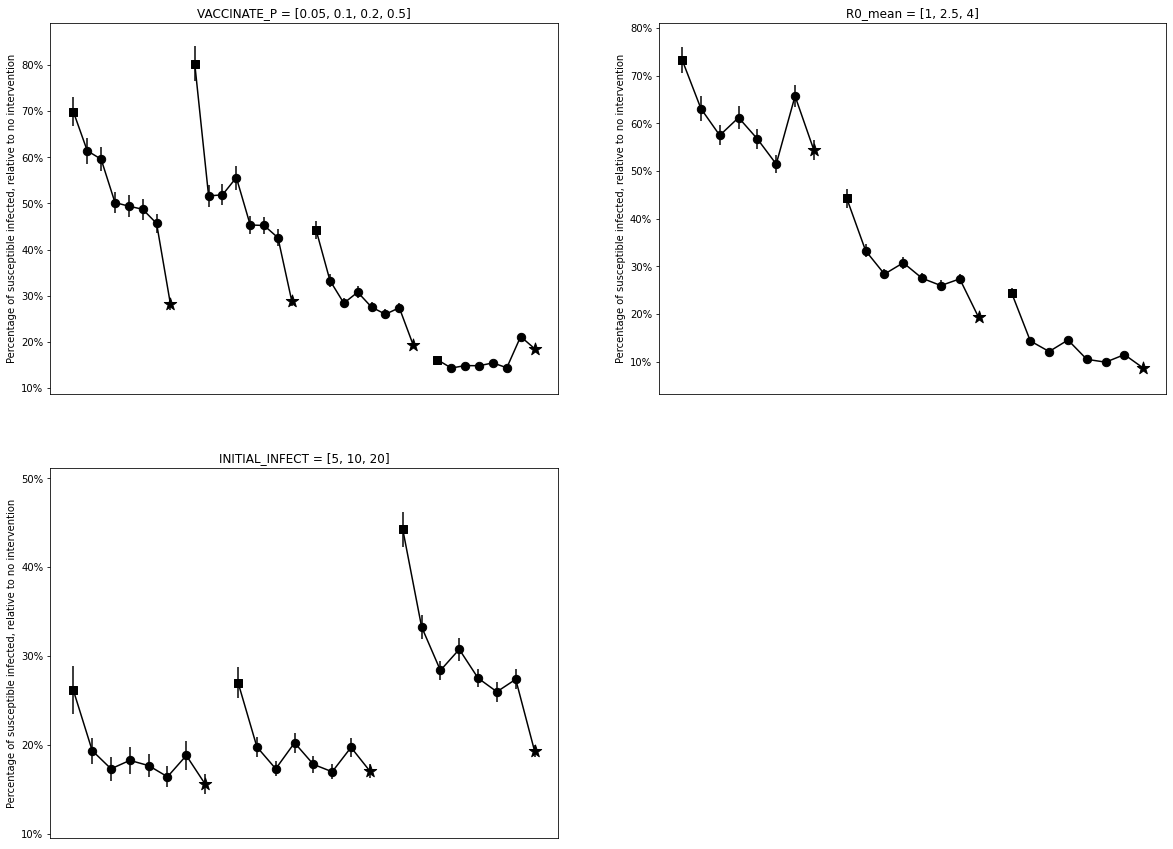

In [21]:
for ni, name in enumerate(names):
    sim_m = modelsets[name]
    df = dfs[name]
    
    display(Markdown(f"# {name}"))

    plt.figure(figsize=(20,15))

    for ci,comp in enumerate(comparisons):
        plt.subplot(2,2,ci+1)
        
        allvs = []
        for Vi,V in enumerate(comparisons[comp]):

            svals = []
            for s in strats:
                d = dict(defaults)
                d[comp] = V
                d['strat'] = s

                inf = sim_m.info( fzd( d ) )
                #print(inf['mean'], [x['mean'] for x in svals])

                svals.append(inf)


            #[s['N']s['mean'] for s in svals]

            xs = np.linspace(0,0.8,len(svals)) + Vi
            ys = np.array([ s['P_sus_inf_rel_none'] for s in svals ])

            #plt.scatter(xs,ys)
            
            yerrs = np.array([s['P_sus_inf_rel_none_err'] for s in svals ],)

            plt.errorbar(
                xs, ys,
                yerr = yerrs,
                color='black'
            )
            #print([s['min'] for s in svals])
            
            for kind, mark, s in zip( [circles, squares, stars], ['o', 's', '*'], [70, 50, 170] ):
                iis = [strats.index(k) for k in kind]
                xsl = [xs[i] for i in iis]
                ysl = [ys[i] for i in iis]
                
                plt.scatter(
                    xsl, ysl,
                    marker=mark,
                    color='black',
                    s=s
                )
            
            allvs.append( np.min(ys-yerrs)-0.05 )
            allvs.append( np.max(ys+yerrs)+0.05 )

        plt.title(f'{comp} = {comparisons[comp]}')
        
        ytk = np.linspace(0,1.0,11)
        plt.yticks(ytk, [f'{t:0.0%}' for t in ytk])
        plt.ylabel('Percentage of susceptible infected, relative to no intervention')
        plt.ylim( min(allvs),max(allvs) )
        
        plt.xticks([],[])
        
    plt.show()

# HS1_expand300

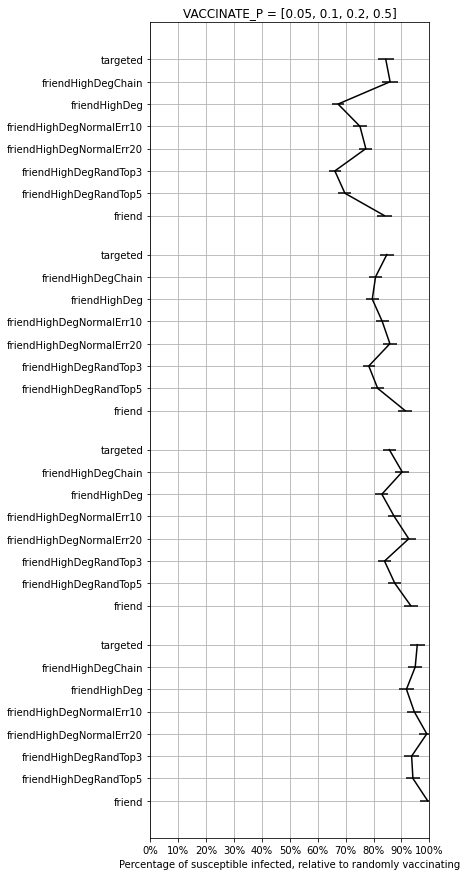

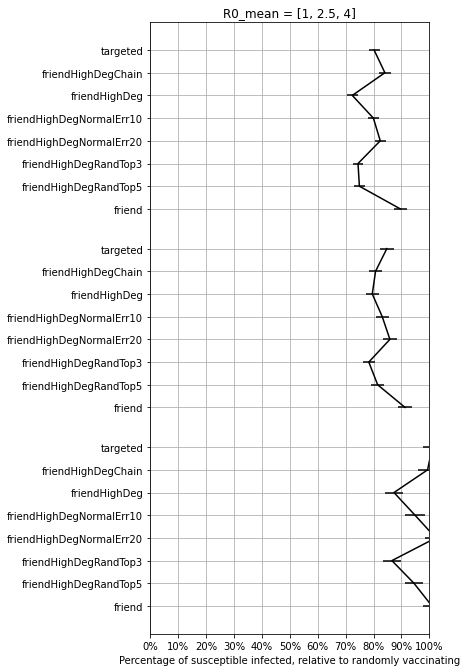

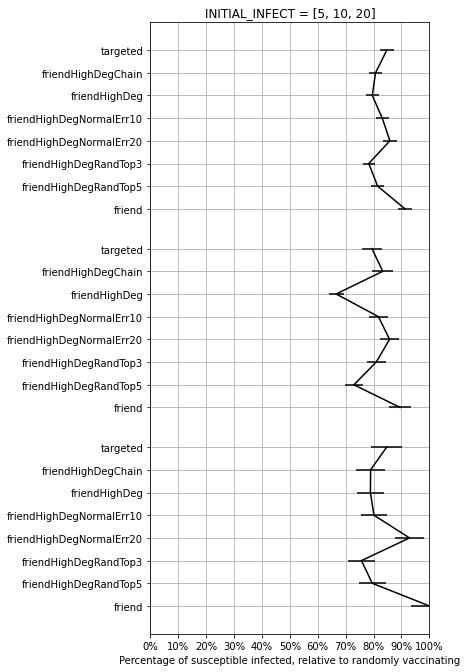

# HS2

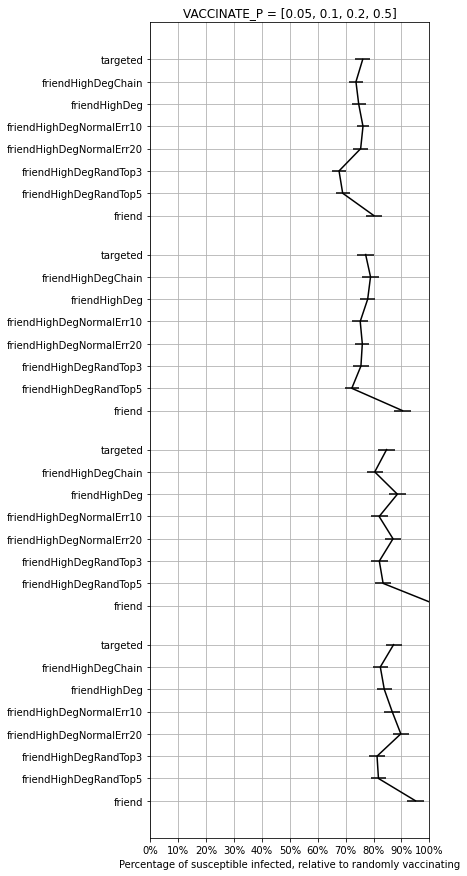

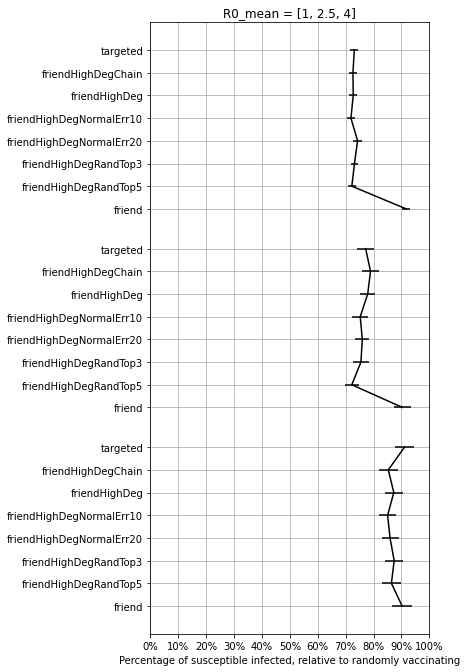

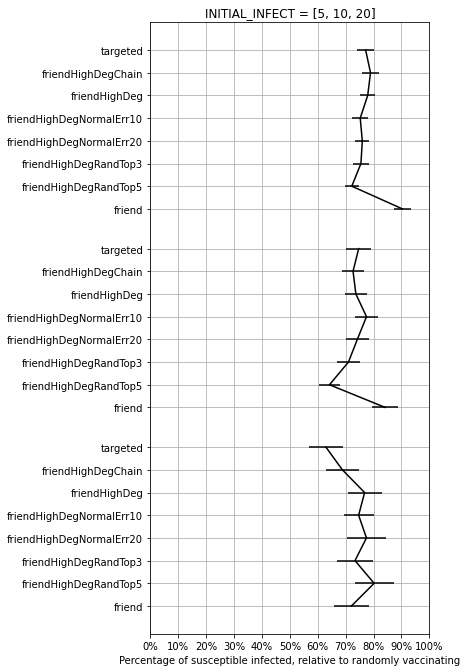

# synthetic_3

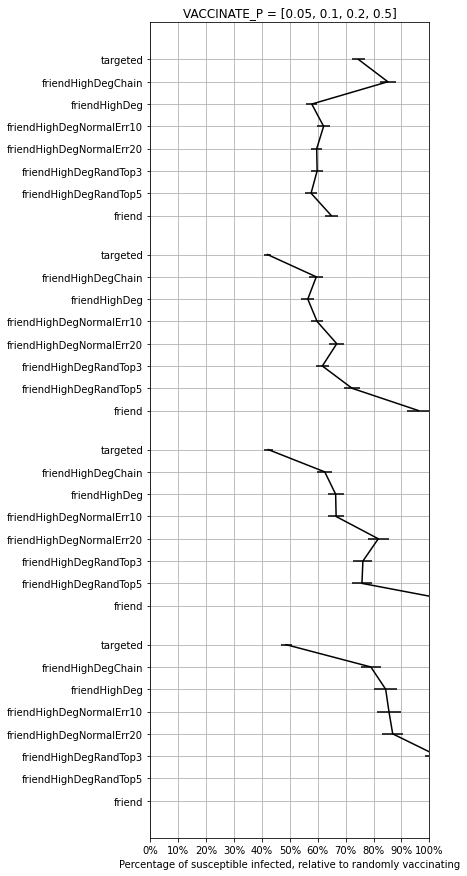

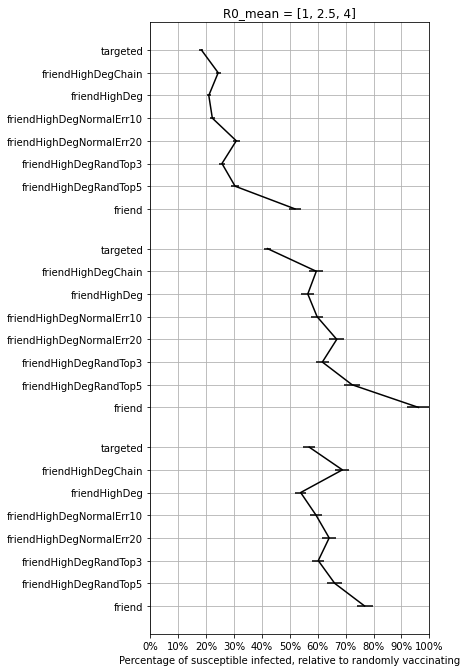

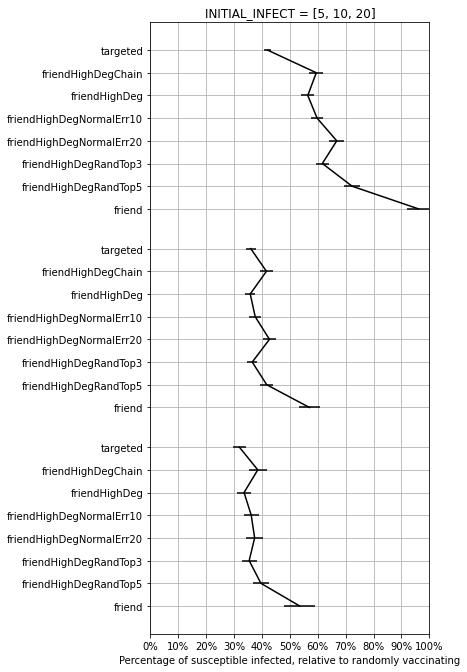

In [22]:
for ni, name in enumerate(names):
    sim_m = modelsets[name]
    df = dfs[name]
    
    display(Markdown(f"# {name}"))

    

    for ci,comp in enumerate(comparisons):
        plt.figure(figsize=(5,15 * len(comparisons[comp])/4))
        #plt.subplot(2,2,ci+1)
        
        allvs = []
        allys = []
        for Vi,V in enumerate(comparisons[comp]):

            svals = []
            for s in strats:
                d = dict(defaults)
                d[comp] = V
                d['strat'] = s

                inf = sim_m.info( fzd( d ) )
                #print(inf['mean'], [x['mean'] for x in svals])

                svals.append(inf)


            #[s['N']s['mean'] for s in svals]

            xs = np.array([ s['P_sus_inf_rel_rand'] for s in svals ])
            ys = np.linspace(0,0.8,len(svals)) + Vi

            #plt.scatter(xs,ys)
            
            xerrs = np.array([s['P_sus_inf_rel_rand_err'] for s in svals ],)

            plt.errorbar(
                xs, ys,
                xerr = xerrs,
                color='black'
            )
            #print([s['min'] for s in svals])
            
            allvs.append( np.min(xs-xerrs)-0.05 )
            allvs.append( np.max(xs+xerrs)+0.05 )
            
            allys += list(ys)

        plt.title(f'{comp} = {comparisons[comp]}')
        
        ytk = np.linspace(0,1.0,11)
        plt.xticks(ytk, [f'{t:0.0%}' for t in ytk])
        plt.xlabel('Percentage of susceptible infected, relative to randomly vaccinating')
        plt.xlim( min(allvs),max(allvs) )
        
        plt.yticks(
            allys,
            len(comparisons[comp])*strats
        )
        
        #plt.vlines([0.5, 0.75, 1], *plt.ylim())
        plt.grid('y')
        plt.xlim(0,1)
        plt.show()

# HS1_expand300

3


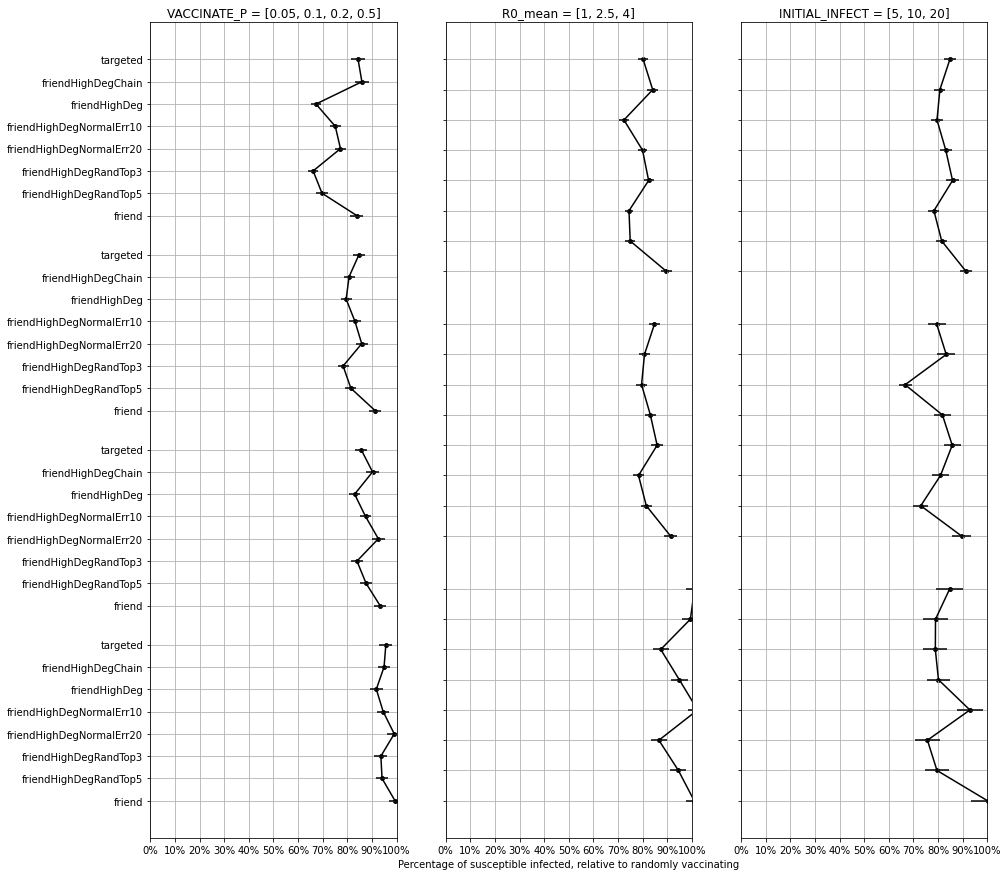

# HS2

3


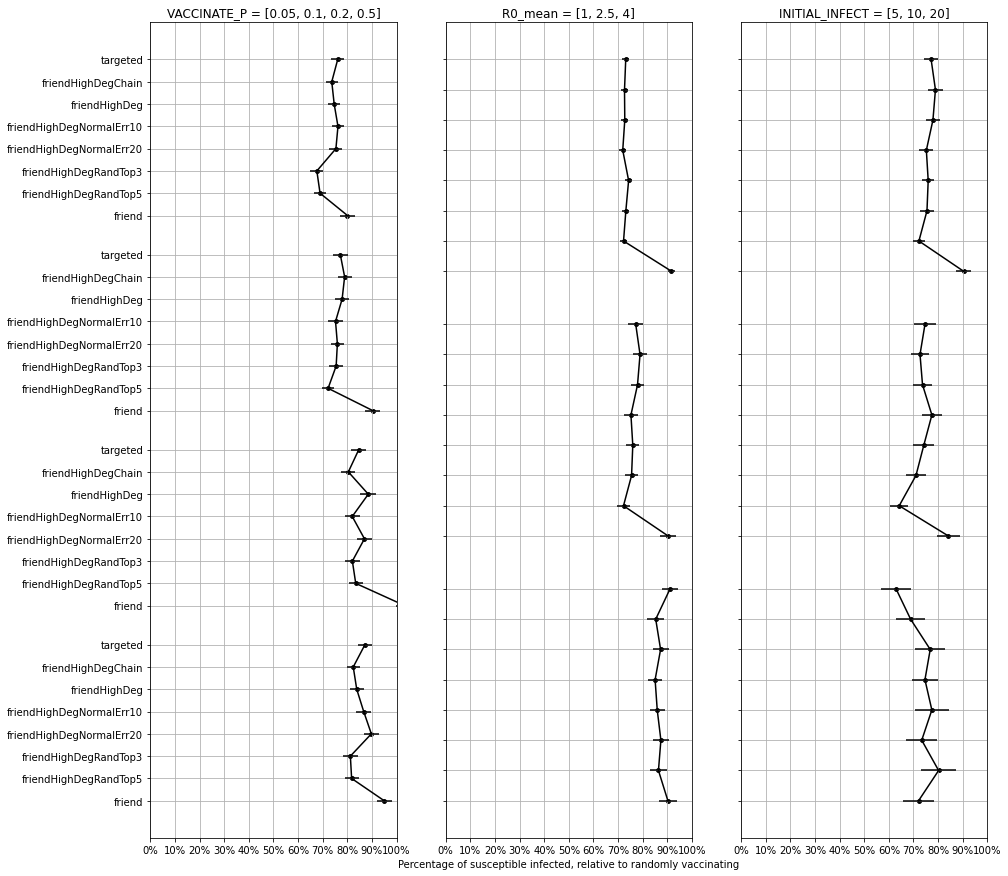

# synthetic_3

3


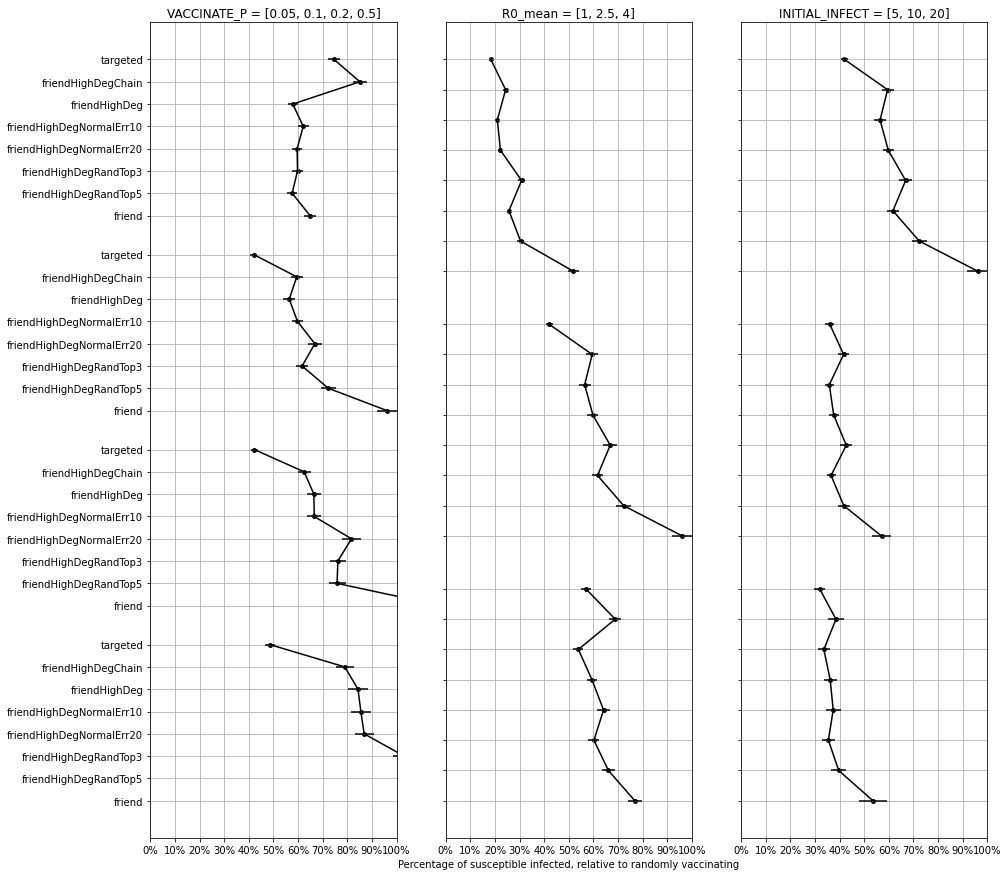

In [23]:
for ni, name in enumerate(names):
    sim_m = modelsets[name]
    df = dfs[name]
    
    display(Markdown(f"# {name}"))

    plt.figure(figsize=(5*3,15))
    for ci,comp in enumerate(comparisons):
        #plt.figure(figsize=(5,15 * len(comparisons[comp])/4))
        plt.subplot(1,3,ci+1)
        
        allvs = []
        allys = []
        for Vi,V in enumerate(comparisons[comp]):

            svals = []
            for s in strats:
                d = dict(defaults)
                d[comp] = V
                d['strat'] = s

                inf = sim_m.info( fzd( d ) )
                #print(inf['mean'], [x['mean'] for x in svals])

                svals.append(inf)


            #[s['N']s['mean'] for s in svals]

            xs = np.array([ s['P_sus_inf_rel_rand'] for s in svals ])
            ys = np.linspace(0,0.8,len(svals)) + Vi

            #plt.scatter(xs,ys)
            
            xerrs = np.array([s['P_sus_inf_rel_rand_err'] for s in svals ],)

            plt.errorbar(
                xs, ys,
                xerr = xerrs,
                color='black'
            )
            plt.scatter(xs, ys, s=15, color='black')
            #print([s['min'] for s in svals])
            
            allvs.append( np.min(xs-xerrs)-0.05 )
            allvs.append( np.max(xs+xerrs)+0.05 )
            
            allys += list(ys)

        plt.title(f'{comp} = {comparisons[comp]}')
        
        ytk = np.linspace(0,1.0,11)
        plt.xticks(ytk, [f'{t:0.0%}' for t in ytk])
        
        if ci==1:
            plt.xlabel('Percentage of susceptible infected, relative to randomly vaccinating')
            
        plt.xlim( min(allvs),max(allvs) )
        
        if ci==0:
            print(Vi)
            plt.yticks(
                allys,
                len(comparisons[comp])*strats
            )
        else:
            plt.yticks(
                allys,
                []
            )
        
        #plt.vlines([0.5, 0.75, 1], *plt.ylim())
        plt.grid('y')
        plt.xlim(0,1)
        
    plt.show()

In [24]:
plt.style.use('seaborn-whitegrid')

In [30]:
titles = {
    "HS1_expand300": "HS-1",
    "HS2": "HS-2",
    "synthetic_3": "Synthetic",
}

In [31]:
strat_print = {
    'friend': "NR",
    'friendHighDegRandTop5': "NP(N=5)",
    'friendHighDegRandTop3': "NP(N=3)",
    'friendHighDegNormalErr20': "NP(ε=20)",
    'friendHighDegNormalErr10': "NP(ε=10)",
    'friendHighDeg': "NP",
    'friendHighDegChain': "NP(c)",
    'targeted': "D"
}

In [47]:
import matplotlib
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 18}

matplotlib.rc('font', **font)

In [6]:
names = [
    'HS1_expand300',
    'HS2',
    'synthetic_3'
]

<Figure size 432x288 with 0 Axes>

# VACCINATE_P = [0.05, 0.1, 0.2, 0.5]

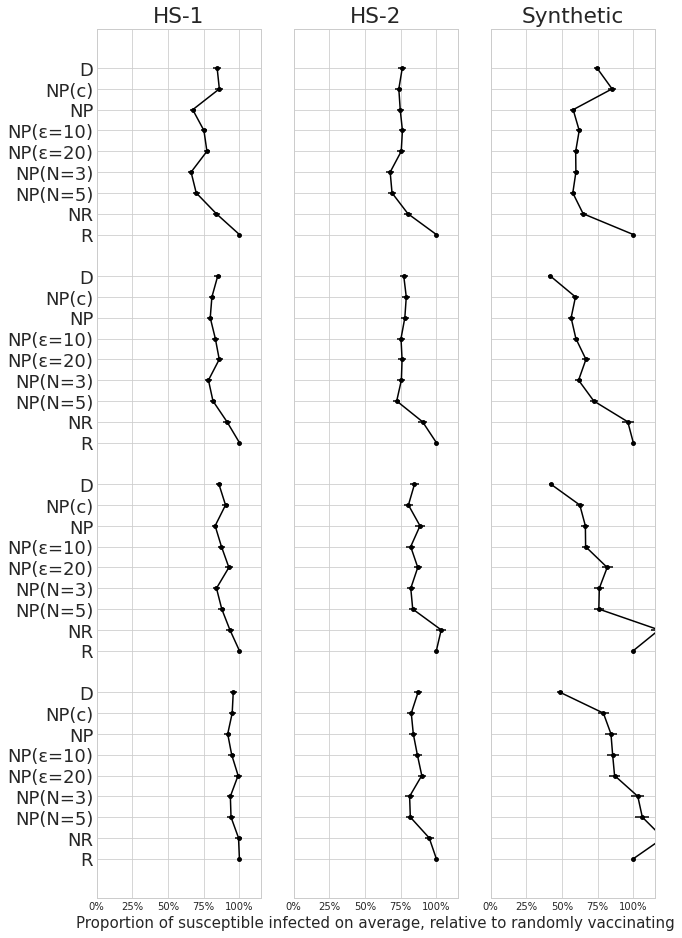

# R0_mean = [1, 2.5, 4]

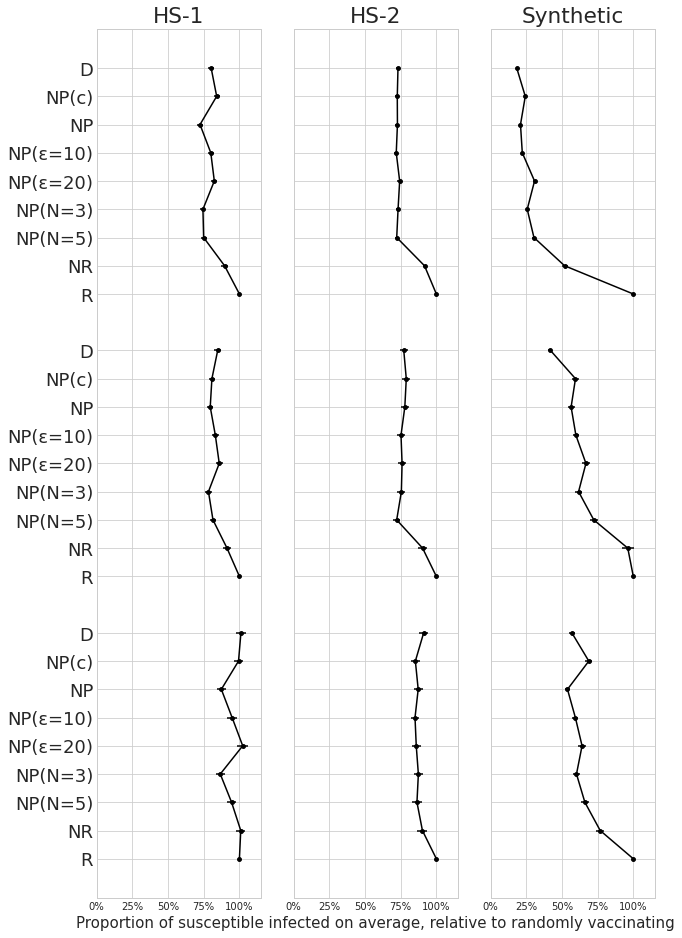

# INITIAL_INFECT = [5, 10, 20]

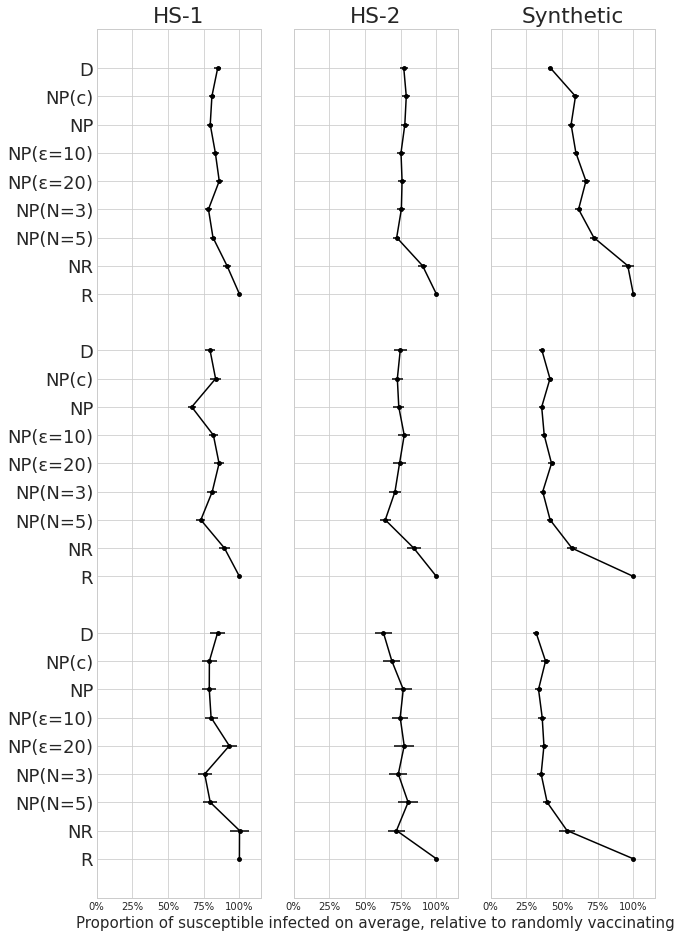

In [54]:
for ci,comp in enumerate(comparisons):
    
    display(Markdown(f"# {comp} = {comparisons[comp]}"))

    plt.figure(figsize=(10,16))
    plt.tight_layout()
    
    for ni, name in enumerate(names):
        #plt.figure(figsize=(5,15 * len(comparisons[comp])/4))
        plt.subplot(1,3,ni+1)
        
        allvs = []
        allys = []
        for Vi,V in enumerate(comparisons[comp]):
            
            sim_m = modelsets[name]
            df = dfs[name]

            svals = []
            for s in strats:
                d = dict(defaults)
                d[comp] = V
                d['strat'] = s

                inf = sim_m.info( fzd( d ) )
                #print(inf['mean'], [x['mean'] for x in svals])

                svals.append(inf)


            #[s['N']s['mean'] for s in svals]

            xs = np.array([1]+[ s['P_sus_inf_rel_rand'] for s in svals ])
            ys = np.linspace(0,0.8,len(svals)+1) + Vi

            #plt.scatter(xs,ys)
            
            xerrs = np.array([0]+[s['P_sus_inf_rel_rand_err'] for s in svals ],)

            plt.errorbar(
                xs, ys,
                xerr = xerrs,
                color='black'
            )
            plt.scatter(xs, ys, s=15, color='black')
            #print([s['min'] for s in svals])
            
            allvs.append( np.min(xs-xerrs)-0.05 )
            allvs.append( np.max(xs+xerrs)+0.05 )
            
            allys += list(ys)

        plt.title(f'{titles[name]}')
        
        ytk = np.linspace(0,1.0,5)
        plt.xticks(ytk, [f'{t:0.0%}' for t in ytk], fontsize=10)
        
        if ni==1:
            plt.xlabel('Proportion of susceptible infected on average, relative to randomly vaccinating', fontsize=15)
            
        plt.xlim( min(allvs),max(allvs) )
        
        if ni==0:
            plt.yticks(
                allys,
                len(comparisons[comp])* (["R"]+[strat_print[s] for s in strats])
            )
        else:
            plt.yticks(
                allys,
                []
            )
        
        #plt.vlines([0.5, 0.75, 1], *plt.ylim())
        plt.grid('y')
        plt.xlim(0,1.15)
        
    plt.savefig(f'figures/{name}.{comp}.png', dpi=300)
    plt.show()